In [ ]:
## Este es un script para leer los datos de TRMM.
## Grafica la pp acumulada cada tres horas y calcula la acumulada para el tiempo considerado 
## (en este caso son 24 horas desde las 12 Z del 22/01/2014 hasta las 12 Z 23/01/2014)

## Mili 16 de agosto 2016 ##

In [14]:
#importamos las librerías para abrir netCDF
import numpy as np

from scipy.io import netcdf
from netCDF4 import Dataset, num2date, date2index      # Librerías netCDF
import netCDF4

from glob import glob
#importamos las librerías para graficar
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
%matplotlib inline

In [5]:
def make_cmap(colors, position=None, bit=False):
#    '''
#    make_cmap takes a list of tuples which contain RGB values. The RGB
#    values may either be in 8-bit [0 to 255] (in which bit must be set to
#    True when called) or arithmetic [0 to 1] (default). make_cmap returns
#    a cmap with equally spaced colors.
#    Arrange your tuples so that the first color is the lowest value for the
#    colorbar and the last is the highest.
#    position contains values from 0 to 1 to dictate the location of each color.
#    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap


In [6]:
fnames = glob('nc_3B42*')
print(fnames)
f =netcdf.netcdf_file(fnames[1]) 
#Vemos las variables del archivo
print(f.variables)
#Vemos las dimensiones de las variables
print(f.dimensions)
#Extraigo la variable pp acumulada por 3 horas
pp  = f.variables['precipitation'][:,:]
nlat = f.variables['nlat'][:]
nlon = f.variables['nlon'][:]
print(pp.shape)
f.close()

['nc_3B42.20140122.18.7.HDF.Z.nc', 'nc_3B42.20140123.03.7.HDF.Z.nc', 'nc_3B42.20140123.00.7.HDF.Z.nc', 'nc_3B42.20140123.06.7.HDF.Z.nc', 'nc_3B42.20140122.21.7.HDF.Z.nc', 'nc_3B42.20140122.15.7.HDF.Z.nc', 'nc_3B42.20140123.09.7.HDF.Z.nc', 'nc_3B42.20140123.12.7.HDF.Z.nc']
{'satPrecipitationSource': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba04210>, 'IRprecipitation': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba04250>, 'nlat': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba043d0>, 'relativeError': <scipy.io.netcdf.netcdf_variable object at 0x7f7f8827ddd0>, 'HQprecipitation': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba04310>, 'satObservationTime': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba04350>, 'precipitation': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba041d0>, 'nlon': <scipy.io.netcdf.netcdf_variable object at 0x7f7f5ba04390>}
{'nlat': 400, 'nlon': 1440}
(1440, 400)


In [7]:
#Parámetros de la proyección Lambert
lon_0 = -63.  
lat_0 = -31.
lat_1 = -31.
lat_2 = -31.

## Limites del campo
minlat = -45
maxlat = -20
minlon = -70
maxlon = -50

nlat_mesh, nlon_mesh = np.meshgrid(nlat,nlon)
#nlon_mesh, nlat_mesh = np.meshgrid(nlon,nlat)

lamb = Basemap(projection='lcc',lon_0=lon_0,lat_0=lat_0,\
              llcrnrlat=minlat,urcrnrlat=maxlat, llcrnrlon=minlon,urcrnrlon=maxlon,\
              lat_1=lat_1,lat_2=lat_2,resolution='h',area_thresh=1000.)
#cmap = plt.get_cmap('Spectral')
nx_mesh, ny_mesh = lamb(nlon_mesh, nlat_mesh)
levels = [1,2,3,4,5,6,7,8,9,10,15,20,25]

#lvels = [1,25,50,75,100,125,150,175]
#00,250,300,350,400,450,500,1000,2000]

colors = [(0,255,0), (0,0,255), (255,0,0)] # This example uses the 8-bit RGB
### Call the function make_cmap which returns your colormap
my_cmap = make_cmap(colors, bit=True)

In [8]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
# Seteo el tamaño que quiero de la figura
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [15, 10]


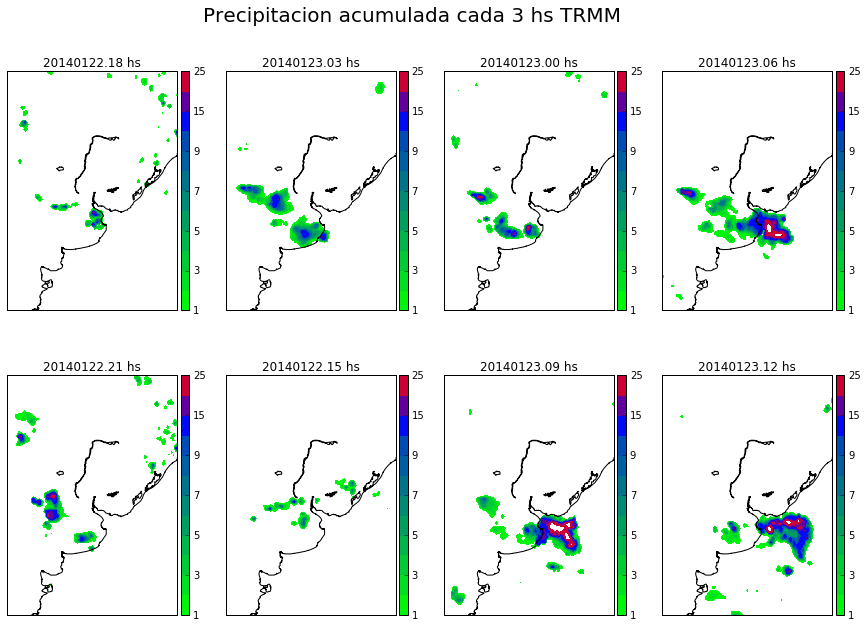

In [9]:
ppAcum36 = np.zeros((1440,400),dtype='f') 
levels = [1,2,3,4,5,6,7,8,9,10,15,20,25]
fig, axes = plt.subplots(nrows=2, ncols=4)

for ax, name in zip(axes.flat, fnames):
    f = netcdf.netcdf_file(name)   
    pp  = f.variables['precipitation'][:,:]
    ppAcum36[:,:] = ppAcum36[:,:] + pp[:,:]
    f.close()
    map_ax = Basemap(projection='lcc',lon_0=lon_0,lat_0=lat_0,\
              llcrnrlat=minlat,urcrnrlat=maxlat, llcrnrlon=minlon,urcrnrlon=maxlon,\
              lat_1=lat_1,lat_2=lat_2,resolution='h',area_thresh=1000.,ax=ax)
    #pp  = f.variables['precipitation'][:,:]
    I = map_ax.contourf(nx_mesh, ny_mesh, pp,levels, cmap=my_cmap)
    map_ax.colorbar(I, size="5%", pad="2%")
    #map_ax.colorbar(I,"bottom", size="5%", pad="2%")
    #map_ax.colorbar()
    ax.set_title(str(name)[8:19] + ' hs')
    map_ax.drawcoastlines()

plt.suptitle('Precipitacion acumulada cada 3 hs TRMM', size=20)
plt.show()


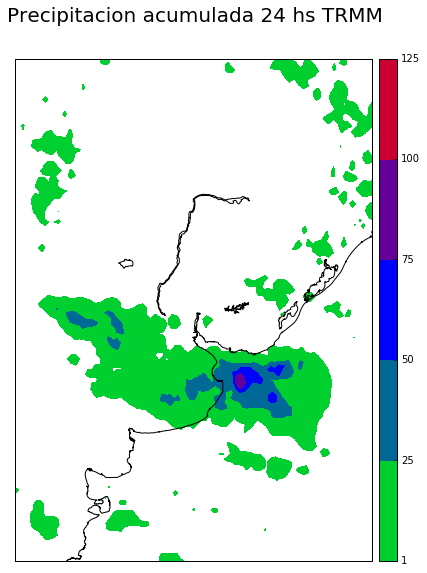

In [10]:
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

levels = [1,25,50,75,100,125]
map_ax2 = Basemap(projection='lcc',lon_0=lon_0,lat_0=lat_0,\
         llcrnrlat=minlat,urcrnrlat=maxlat, llcrnrlon=minlon,urcrnrlon=maxlon,\
         lat_1=lat_1,lat_2=lat_2,resolution='h',area_thresh=1000.)
map_ax2.contourf(nx_mesh, ny_mesh, ppAcum36,levels, cmap=my_cmap)

map_ax2.drawcoastlines()
map_ax2.colorbar()
plt.suptitle('Precipitacion acumulada 24 hs TRMM', size=20)
plt.show()

In [34]:
########## Guardo netCDF ###################

try: newdata.close()  # por seguridad, nos aseguramos que el archivo no esté abierto ya 
except: pass
newfile='/datos/estaciones/TRMM_ppAcum_36hs.nc'  
newdata=netCDF4.Dataset(newfile,'w')
newdata.title="Precipitacion acumulada de TRMM entre 12Z del 22 a las 12Z del 23"
newdata.Conventions="COARDS"
newdata.dataType='Grid'
newdata.history='SDF Netcdf con los cálculos de precipitacion acumulada de TRMM entre 12Z del 22 a las 12Z del 23'

newdata.createDimension('lat', nlat.shape[0])
newdata.createDimension('lon', nlon.shape[0])
#newdata.createDimension('time', len(fnames))

# Ahora guardo todas las variables y flags que calculé
### There is a little more flexibility with this variables attributes!
### (f4=float32) ###

lat_var=newdata.createVariable('lat','f4',('lat'), fill_value=np.nan)
lat_var.long_name='Latitud'
lat_var.units='º'
lat_var[:]= nlat[:]

lon_var=newdata.createVariable('lon','f4',('lon'), fill_value=np.nan)
lon_var.long_name='Longitud '
lon_var.units='º'
lon_var[:]= nlon[:]

ppAcum36_var=newdata.createVariable('ppAcum36','f4',('lat','lon'),fill_value=np.nan)
ppAcum36_var.long_name='Accumulated total cumulus precipitation 22 12 Z hasta 23 12 Z'
ppAcum36_var.units='mm'
ppAcum36_var[:]=ppAcum36[:,:]


newdata.close()

In [25]:
nlon.shape[0]

1440

In [23]:
nlat.shape[:]

(400,)

In [32]:
ppAcum36.shape


(1440, 400)